## Q1. Delivery_time => Predict delivery time using sorting time.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df = df[['Sorting Time','Delivery Time']]
df = df.rename(columns={'Sorting Time':'Sorting','Delivery Time':'Delivery'})
df

,Sorting,Delivery
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [5]:
df.describe()

,Sorting,Delivery
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


## Data Visualisation

<AxesSubplot:xlabel='Sorting', ylabel='Density'>

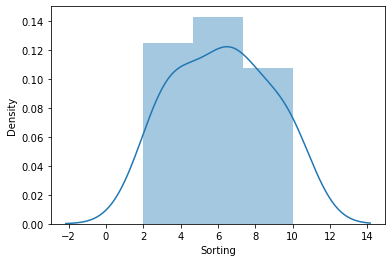

In [6]:
sns.distplot(df['Sorting'])

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

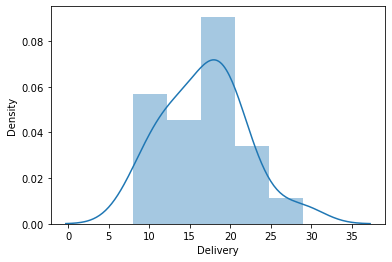

In [7]:
sns.distplot(df['Delivery'])

In [8]:
df['Delivery'].skew()

0.3523900822831107

In [9]:
df.corr()

,Sorting,Delivery
Sorting,1.000000,0.825997
Delivery,0.825997,1.000000


<AxesSubplot:>

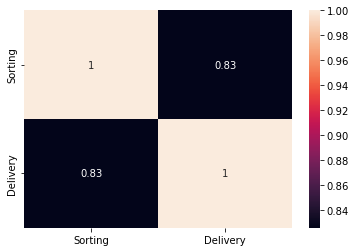

In [10]:
sns.heatmap(df.corr(),annot=True)

## Model Building

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols('Delivery~Sorting', data=df).fit()

In [13]:
# Model parameters
c, m = model.params.round(2)
c, m

(6.58, 1.65)

## Line Equation

In [14]:
x = 5
y = m * x + c 
y

14.83

## R2 Value

In [15]:
model.rsquared

0.6822714748417231

## Prediction For New Data

In [16]:
newdf = pd.Series([1,12,16,22,32])
newdf = pd.DataFrame(data=newdf, columns=['Sorting'])
newdf

,Sorting
0,1
1,12
2,16
3,22
4,32


In [17]:
newdf['Delivery'] = model.predict(newdf). round(2)
newdf

,Sorting,Delivery
0,1,8.23
1,12,26.37
2,16,32.97
3,22,42.86
4,32,59.35


## Data Transformation

In [18]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 200

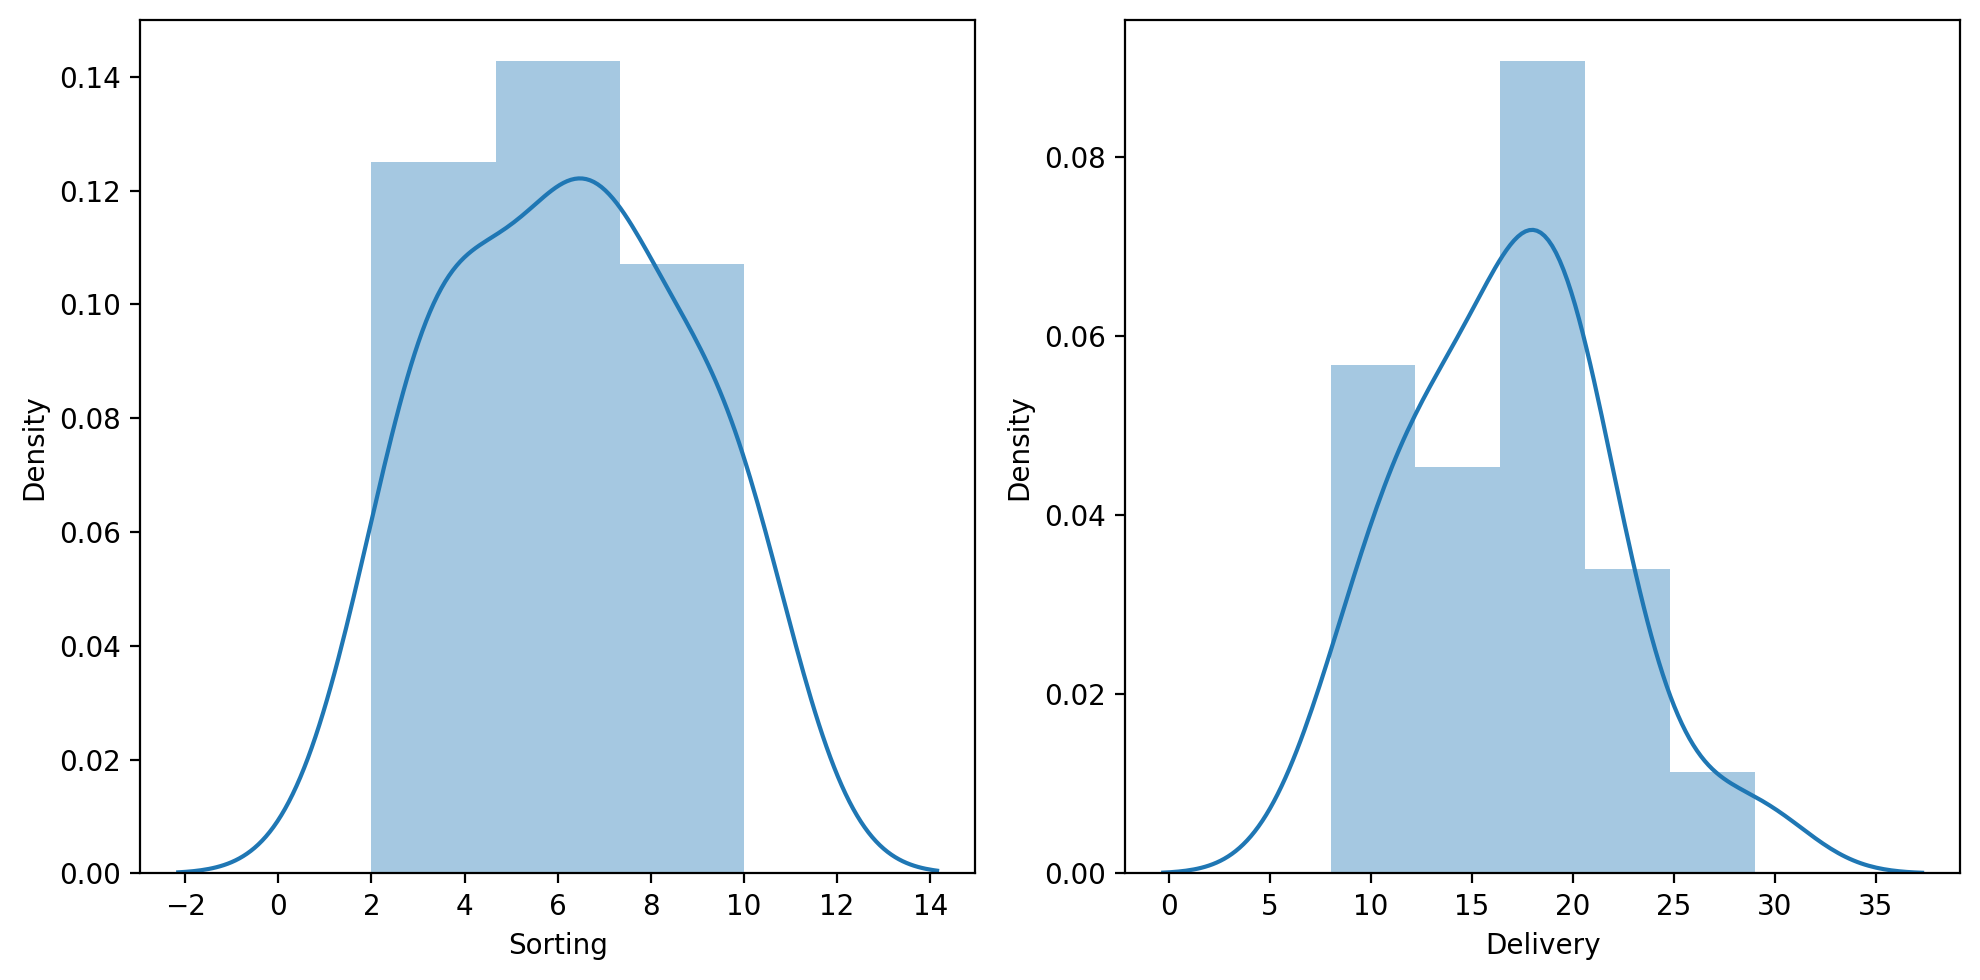

In [19]:
plt.subplot(1,2,1)
sns.distplot(df['Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['Delivery'])
plt.tight_layout()

## Log Transformation

In [20]:
df['log_Sorting'] = np.log(df['Sorting'])
df['log_Delivery'] = np.log(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery
0,10,21.00,2.302585,3.044522
1,4,13.50,1.386294,2.602690
2,6,19.75,1.791759,2.983153
3,9,24.00,2.197225,3.178054
4,10,29.00,2.302585,3.367296


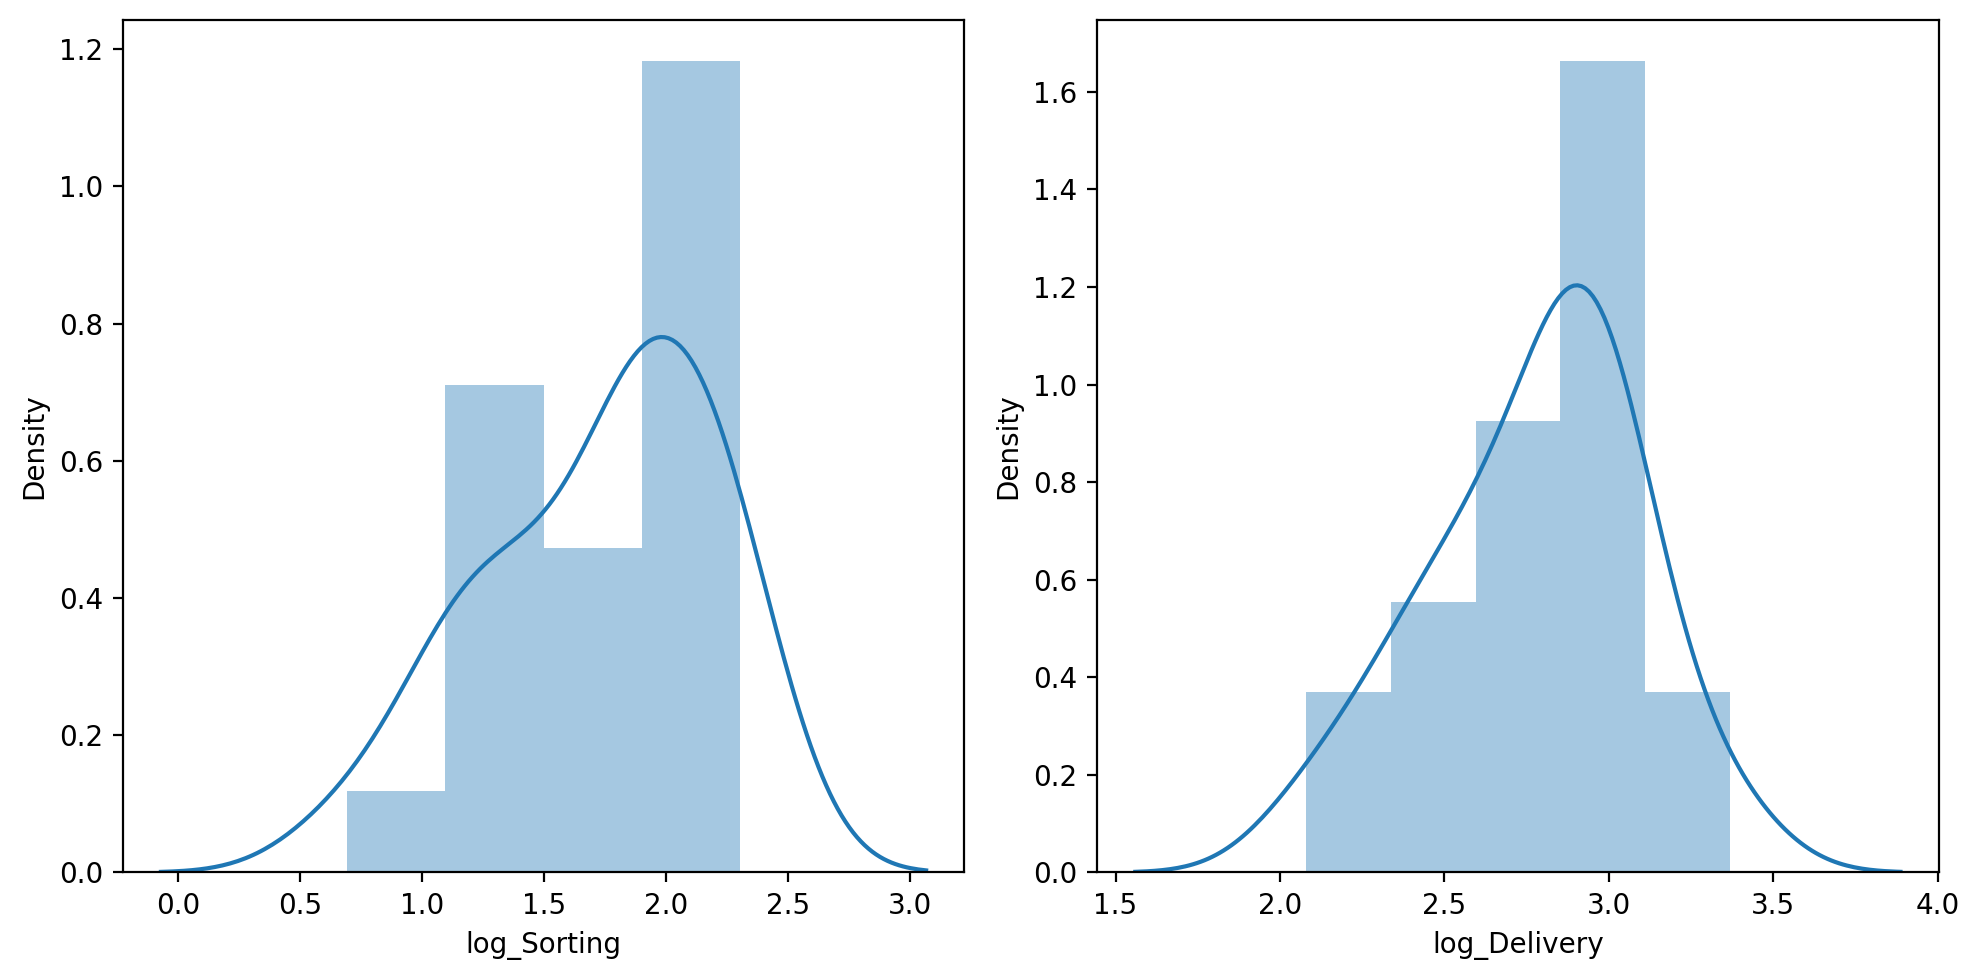

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['log_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['log_Delivery'])
plt.tight_layout()

In [22]:
print(df['log_Sorting'].skew(), df['log_Delivery'].skew())

-0.6052357185134765 -0.4512901148522999


## Square-root Transformation

In [23]:
df['sqrt_Sorting'] = np.sqrt(df['Sorting'])
df['sqrt_Delivery'] = np.sqrt(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery,sqrt_Sorting,sqrt_Delivery
0,10,21.00,2.302585,3.044522,3.162278,4.582576
1,4,13.50,1.386294,2.602690,2.000000,3.674235
2,6,19.75,1.791759,2.983153,2.449490,4.444097
3,9,24.00,2.197225,3.178054,3.000000,4.898979
4,10,29.00,2.302585,3.367296,3.162278,5.385165


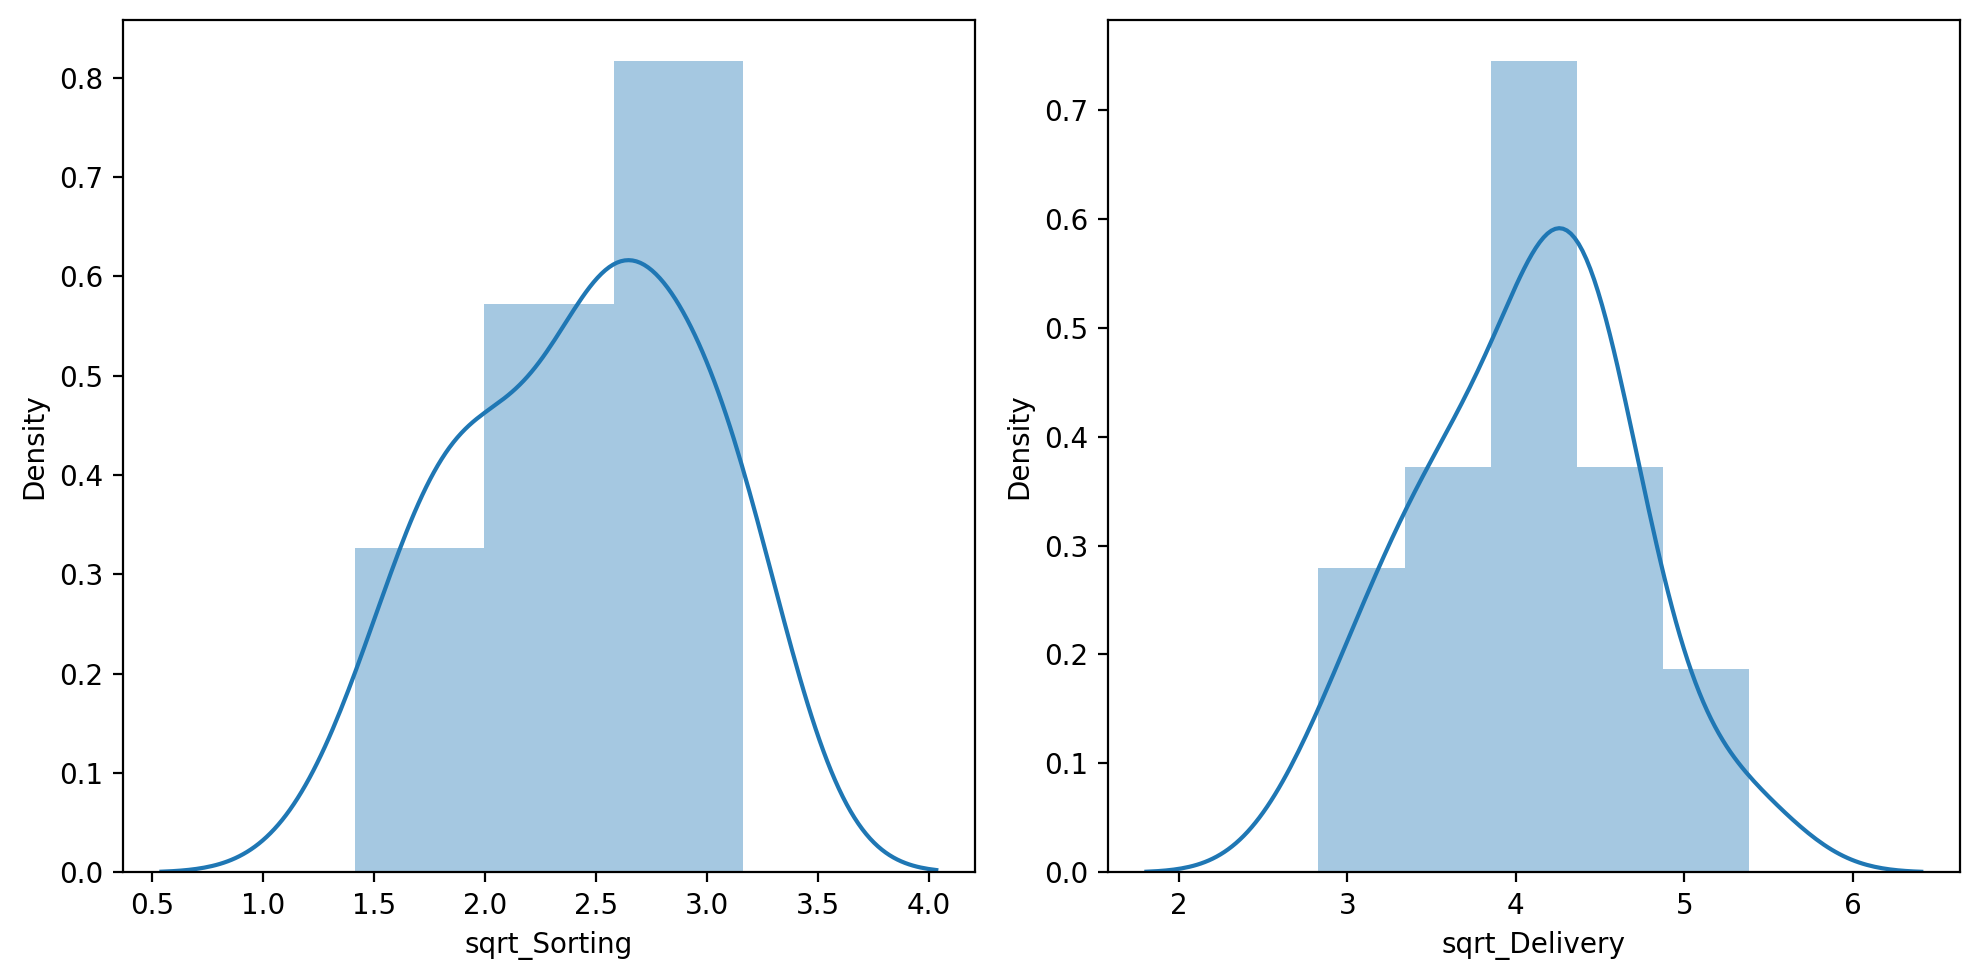

In [24]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Delivery'])
plt.tight_layout()

## Square Transformation

In [25]:
df['sq_Sorting'] = np.square(df['Sorting'])
df['sq_Delivery'] = np.square(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery,sqrt_Sorting,sqrt_Delivery,sq_Sorting,sq_Delivery
0,10,21.00,2.302585,3.044522,3.162278,4.582576,100,441.0000
1,4,13.50,1.386294,2.602690,2.000000,3.674235,16,182.2500
2,6,19.75,1.791759,2.983153,2.449490,4.444097,36,390.0625
3,9,24.00,2.197225,3.178054,3.000000,4.898979,81,576.0000
4,10,29.00,2.302585,3.367296,3.162278,5.385165,100,841.0000


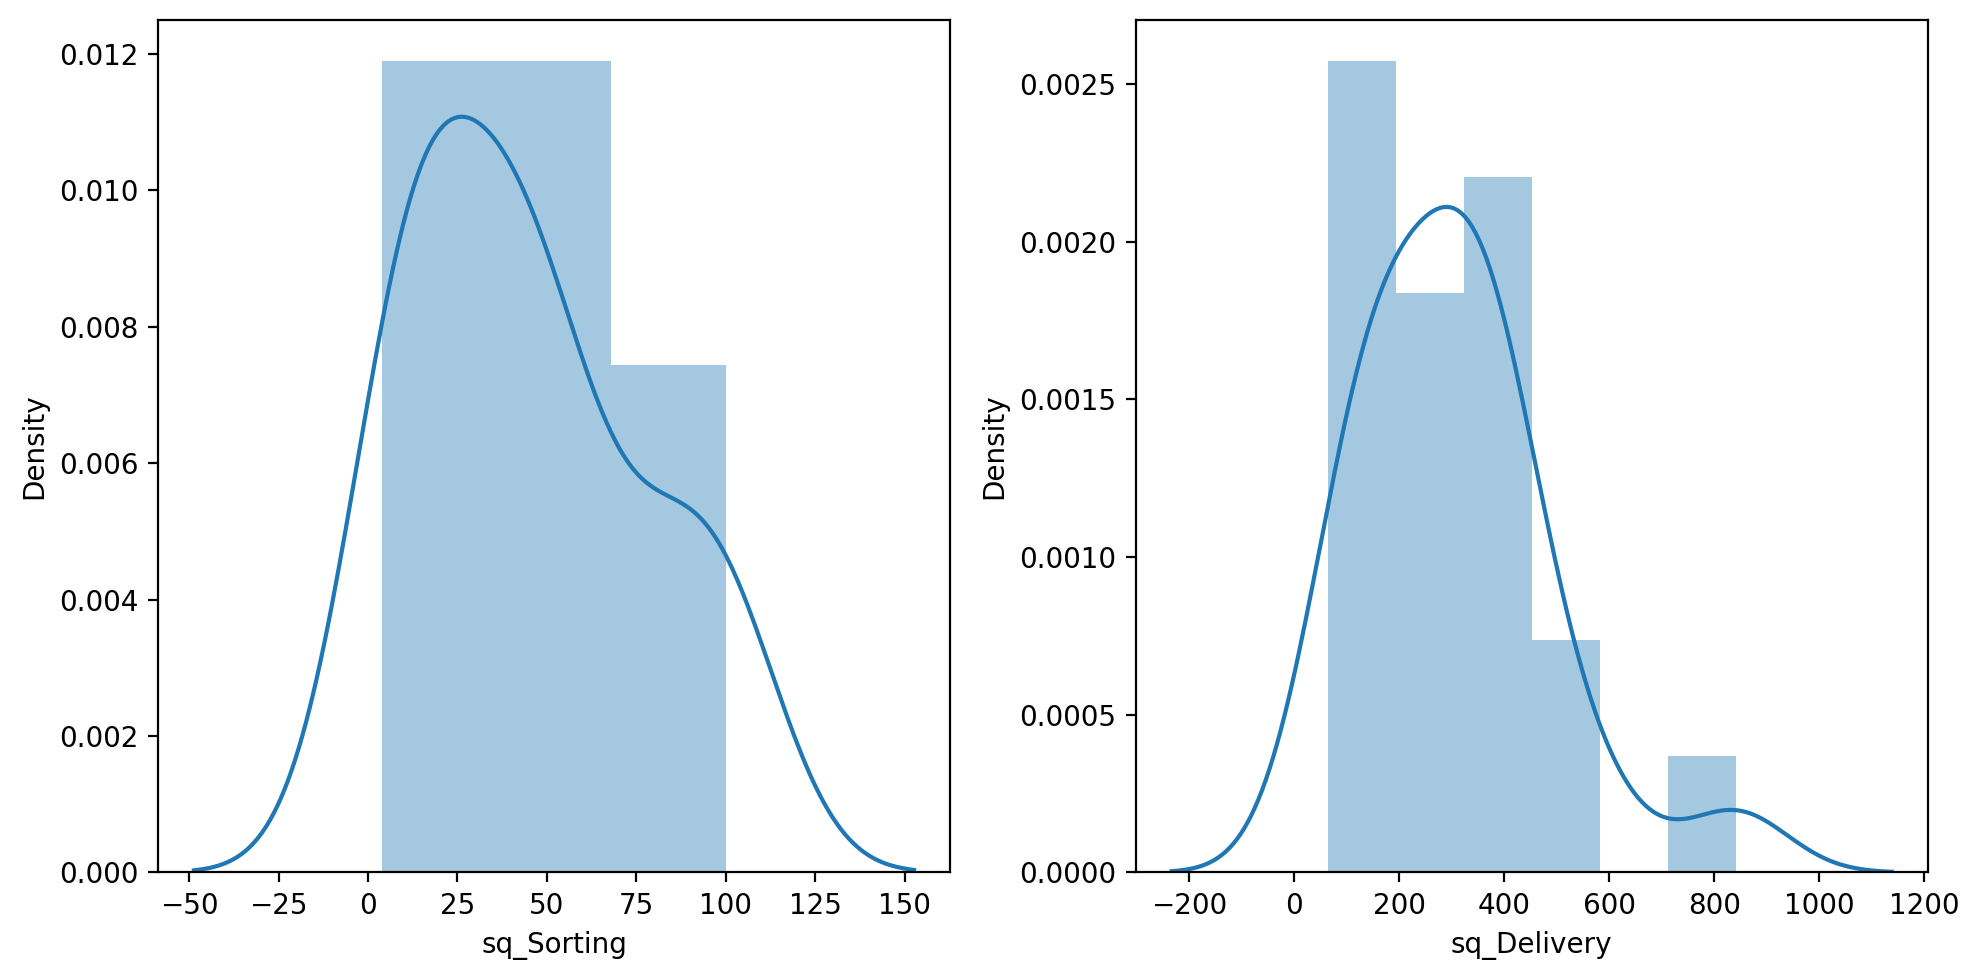

In [26]:
plt.subplot(1,2,1)
sns.distplot(df['sq_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sq_Delivery'])
plt.tight_layout()

In [27]:
print(df['sq_Sorting'].skew(), df['sq_Delivery'].skew())

0.5594219654616026 1.2363588519529751


## Q2. Salary_hike -> Build a prediction model for Salary_hike

In [28]:
df1 = pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Data Visualisation

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

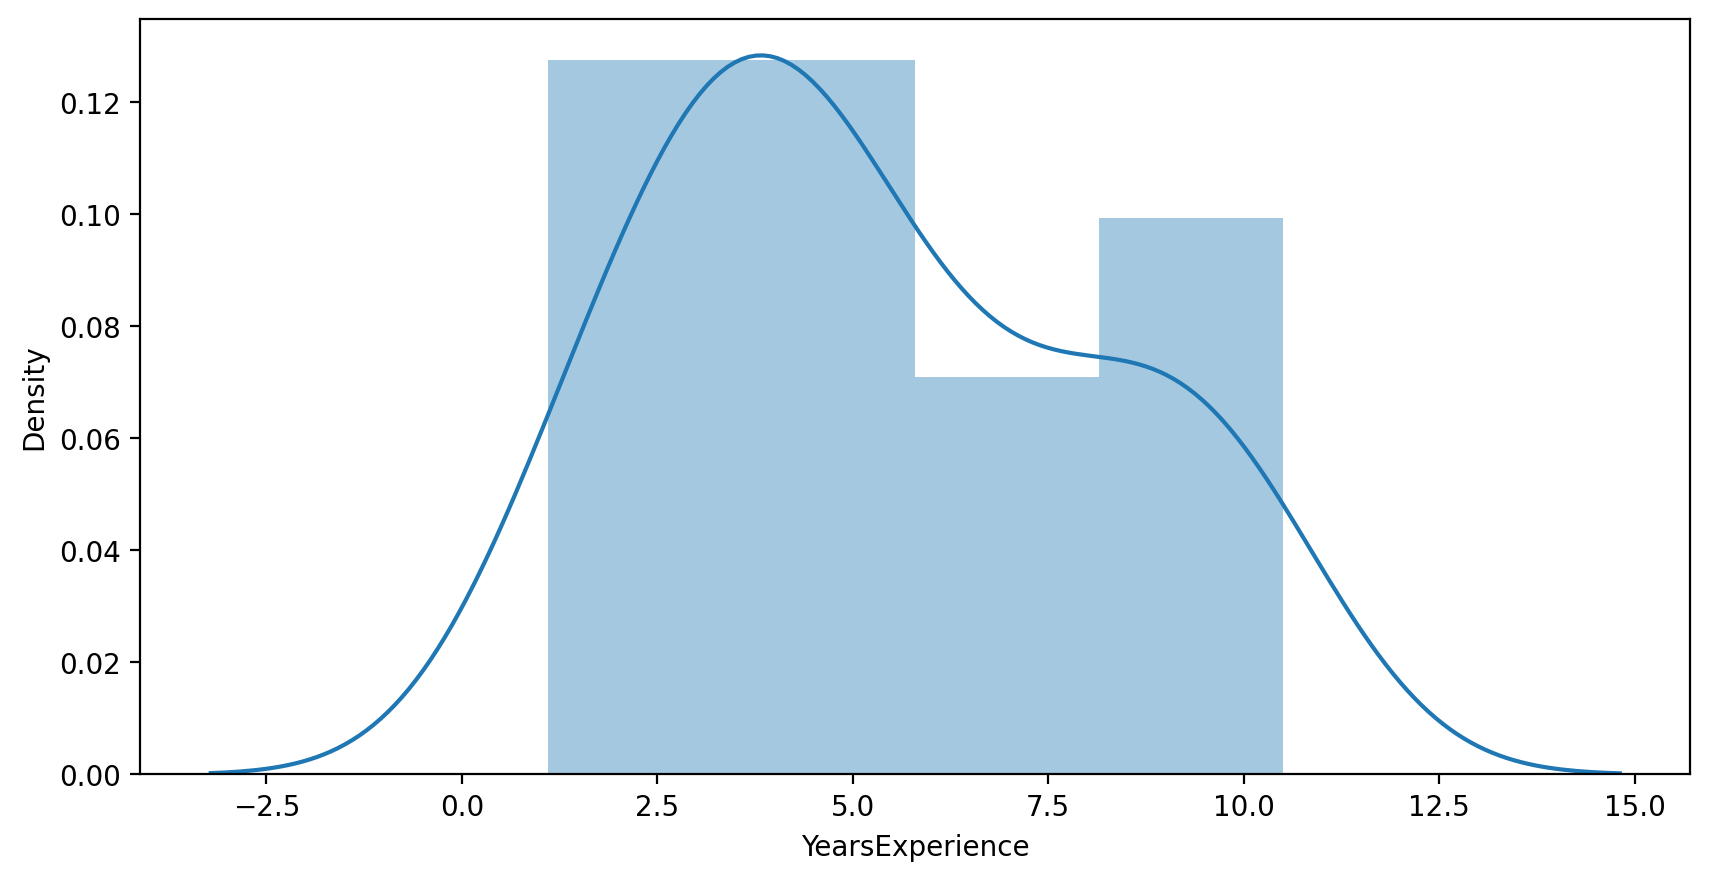

In [30]:
sns.distplot(df1['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

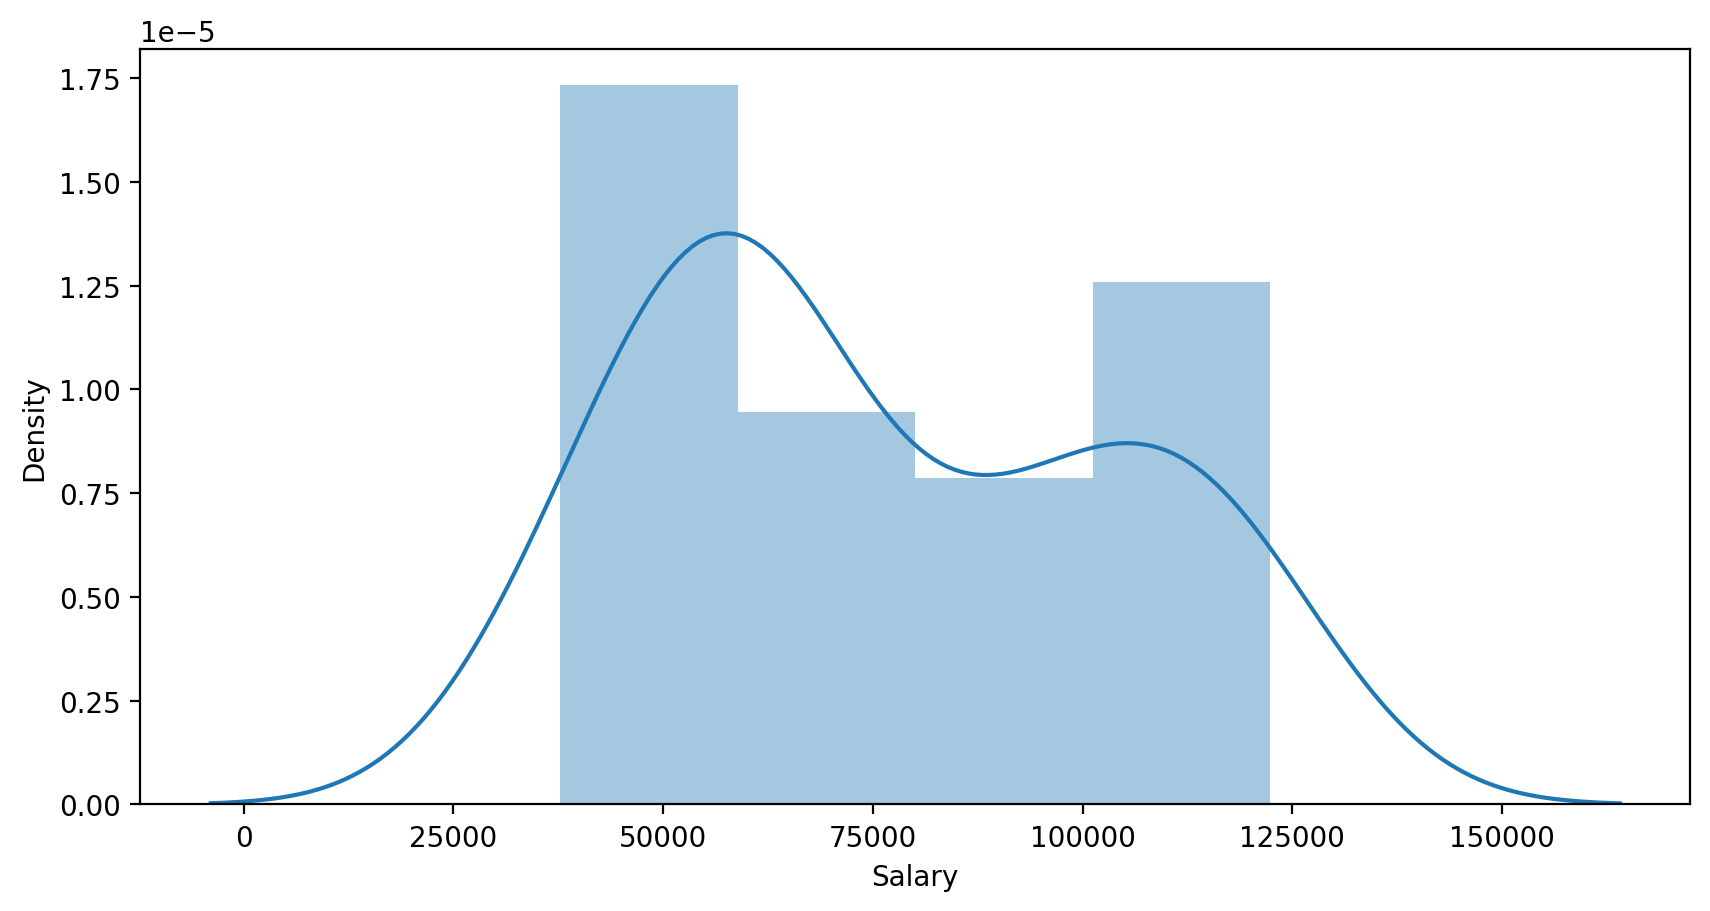

In [31]:
sns.distplot(df1['Salary'])

In [32]:
print(df1['YearsExperience'].skew(), df1['Salary'].skew())

0.37956024064804106 0.35411967922959153


In [33]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

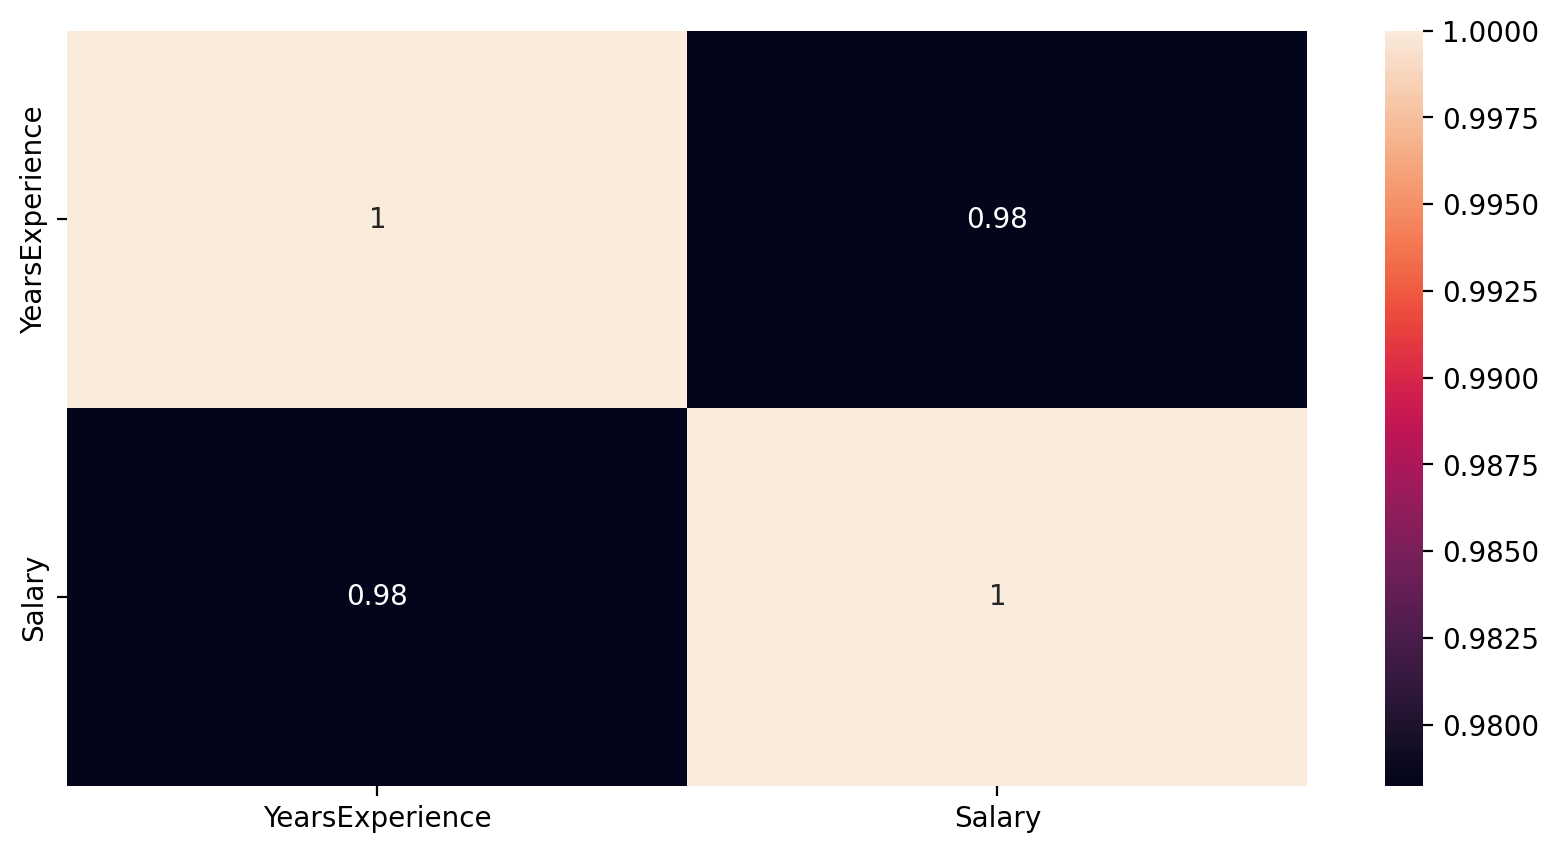

In [34]:
sns.heatmap(data=df1.corr(),annot=True)

### Model Building

In [35]:
import statsmodels.formula.api as smf

In [36]:
model = smf.ols('Salary~YearsExperience', data=df1).fit()

In [37]:
c, m = model.params.round(1)
c, m

(25792.2, 9450.0)

### LIne Equation

In [38]:
x = 4.7
y = m * x + c 
y

70207.2

### R2 Value

In [39]:
model.rsquared

0.9569566641435086

### Prediction For New Data

In [40]:
newdf1 = pd.Series([1,2.6,3.4,4.7,5.6,6.5,7.5,8.6,11])
newdf1 = pd.DataFrame(data=newdf1,columns=['YearsExperience'])
newdf1

,YearsExperience
0,1.0
1,2.6
2,3.4
3,4.7
4,5.6
5,6.5
6,7.5
7,8.6
8,11.0


In [41]:
newdf1['Salary'] = model.predict(newdf1).round(1)
newdf1

,YearsExperience,Salary
0,1.0,35242.2
1,2.6,50362.1
2,3.4,57922.1
3,4.7,70207.0
4,5.6,78712.0
5,6.5,87217.0
6,7.5,96666.9
7,8.6,107061.9
8,11.0,129741.8


### Data Transformation

In [42]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

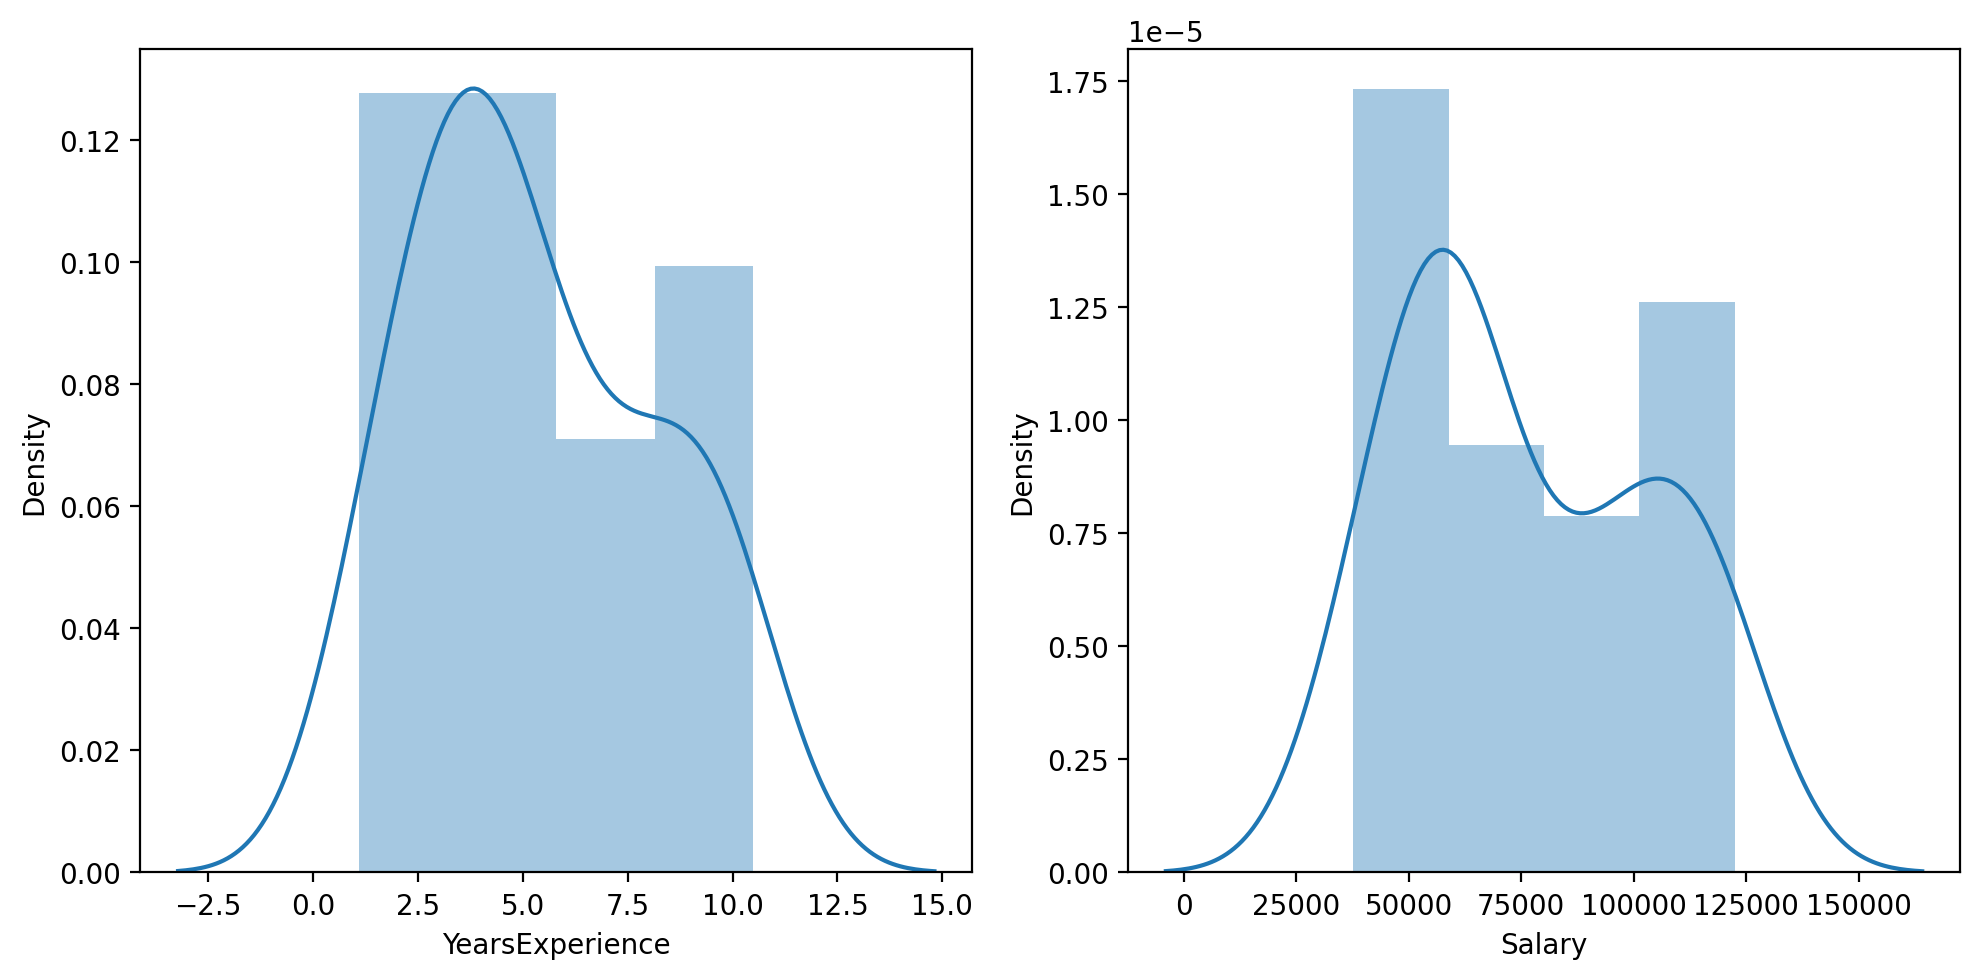

In [43]:
plt.subplot(1,2,1)
sns.distplot(df1['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df1['Salary'])
plt.tight_layout()

In [44]:
print(df1['YearsExperience'].skew(), df1['Salary'].skew())

0.37956024064804106 0.35411967922959153


### Log Transformation

In [45]:
df1['log_Year'] = np.log(df1['YearsExperience'])
df1['log_Salary'] = np.log(df1['Salary'])
df1.head()

,YearsExperience,Salary,log_Year,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


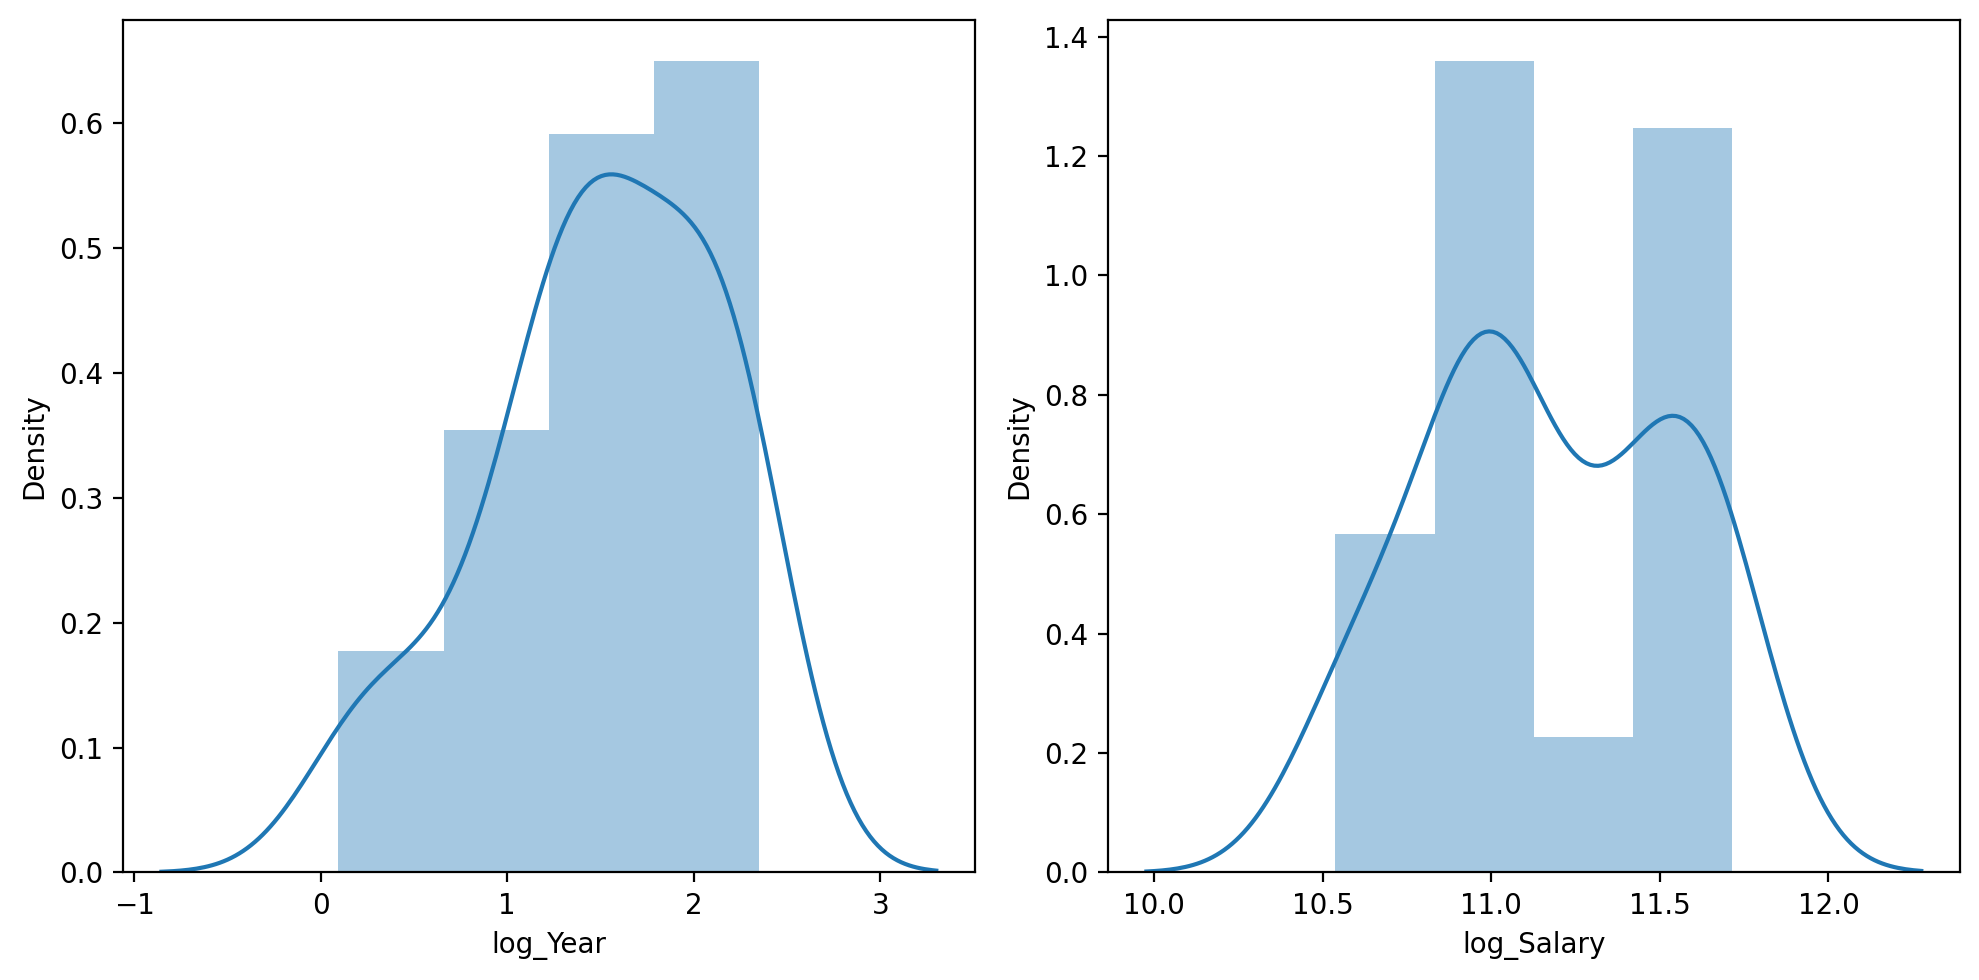

In [47]:
plt.subplot(1,2,1)
sns.distplot(df1['log_Year'])

plt.subplot(1,2,2)
sns.distplot(df1['log_Salary'])
plt.tight_layout()

In [48]:
print(df1['log_Year'].skew(), df1['log_Salary'].skew())

-0.6005648582626513 -0.044126086756988495


### Square-root Transformation

In [49]:
df1['sqrt_Year'] = np.sqrt(df1['YearsExperience'])
df1['sqrt_Salary'] = np.sqrt(df1['Salary'])
df1.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


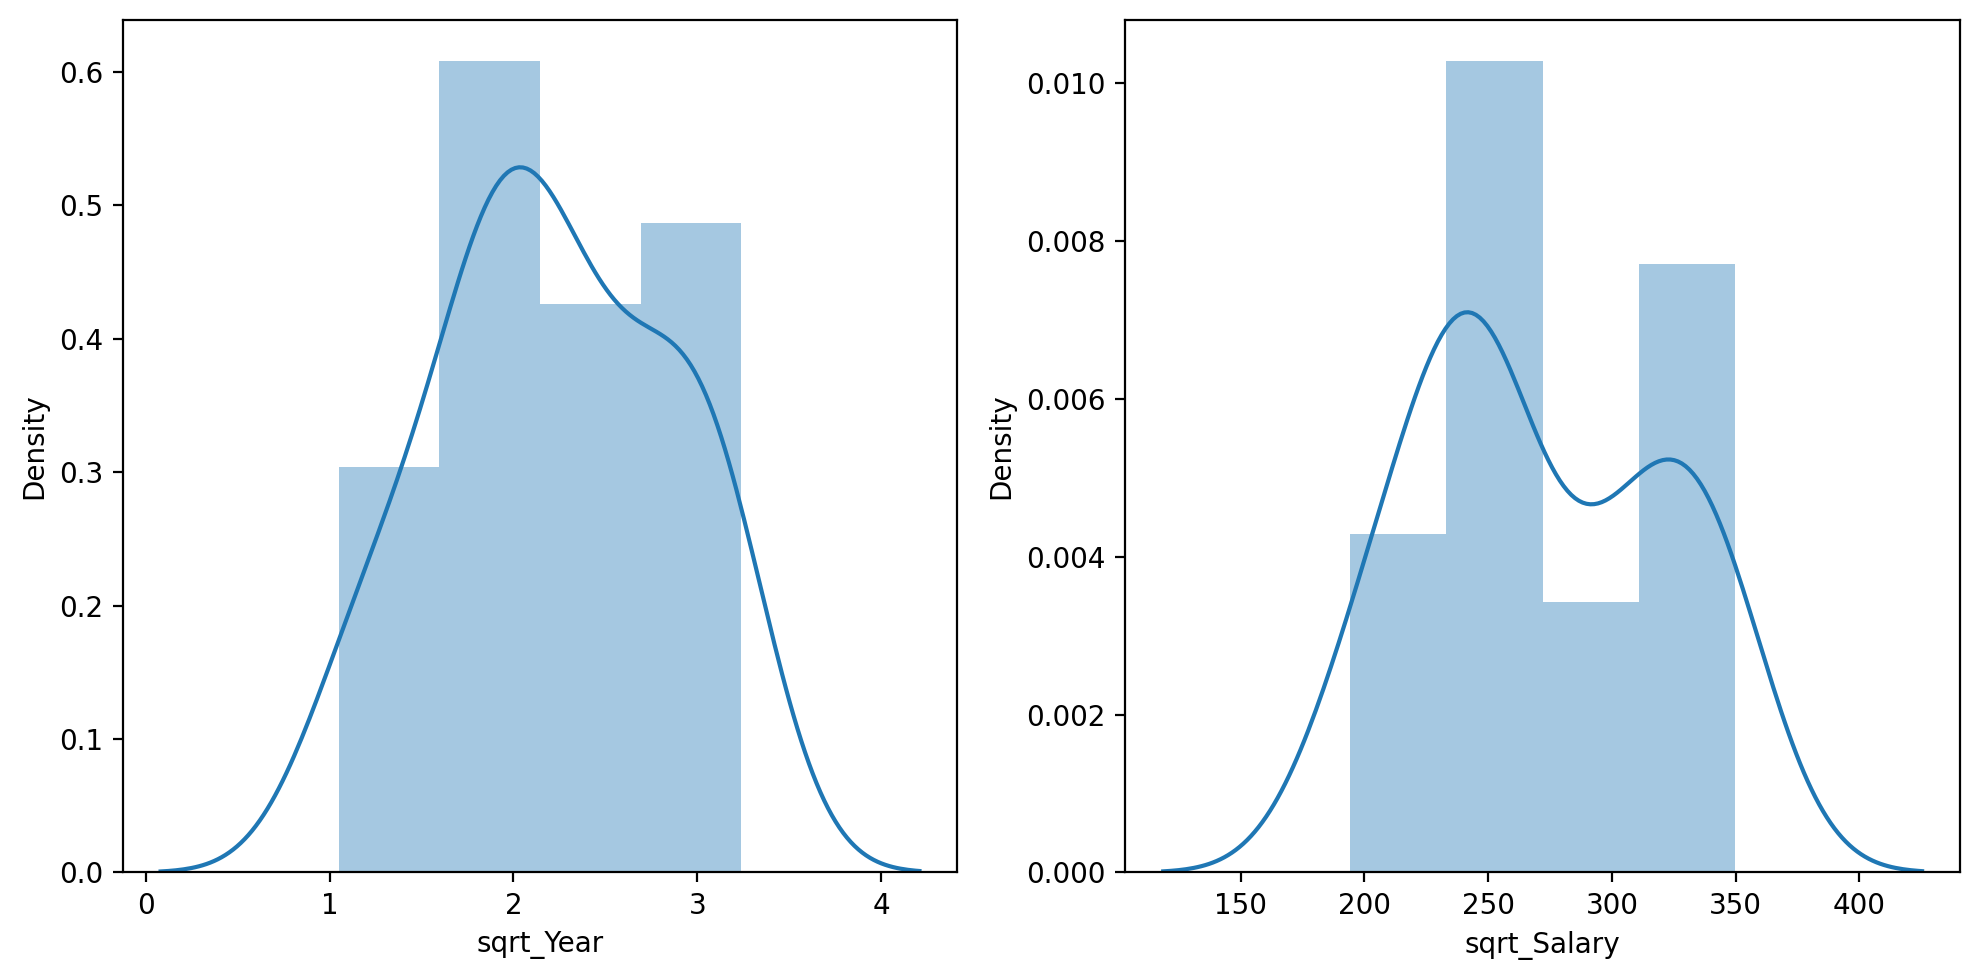

In [50]:
plt.subplot(1,2,1)
sns.distplot(df1['sqrt_Year'])

plt.subplot(1,2,2)
sns.distplot(df1['sqrt_Salary'])
plt.tight_layout()

In [53]:
print(df1['sqrt_Year'].skew(), df1['sqrt_Salary'].skew())

-0.04919608394250605 0.16904336802767353


### Square Transforamtion

In [55]:
df1['sq_Year'] = np.square(df1['YearsExperience'])
df1['sq_Salary'] = np.square(df1['Salary'])
df1.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary,sq_Year,sq_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.21,1.547872e+09
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.69,2.134902e+09
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,2.25,1.423628e+09
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,4.00,1.894426e+09
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,4.84,1.591292e+09


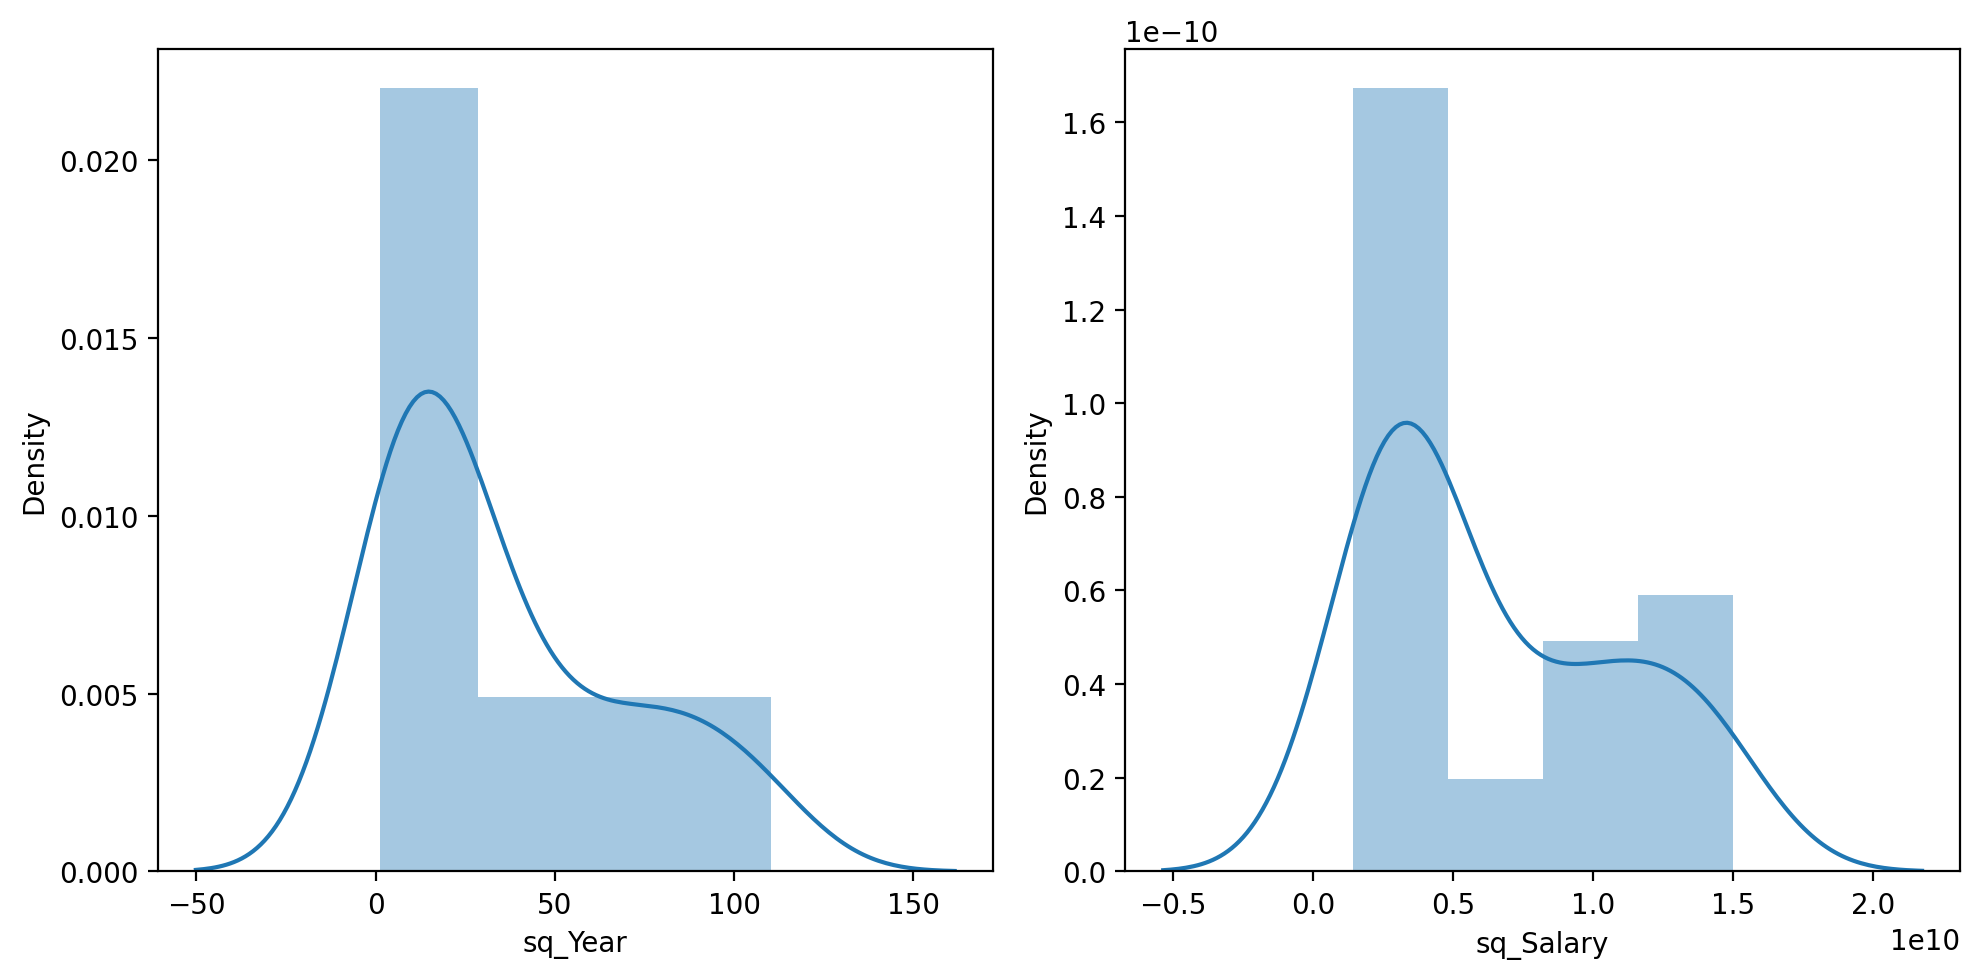

In [57]:
plt.subplot(1,2,1)
sns.distplot(df1['sq_Year'])

plt.subplot(1,2,2)
sns.distplot(df1['sq_Salary'])
plt.tight_layout()

In [58]:
print(df1['sq_Year'].skew(), df1['sq_Salary'].skew())

0.9449331187803115 0.6568711320115498
